In [1]:
import string
import pandas as pd
import numpy as np

import textwrap
import requests 
import json
import os


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math



path = './Data/LdaRomances/'

In [2]:
def normalize(data):
    return data/np.sum(data)

def top_n_indices(data, n):
    ind = np.argpartition(data, -n)[-n:]
    ind = ind[np.argsort(data[ind])][::-1]
    #print(ind)
    return ind

print(top_n_indices(np.array([0,1,2,3,4,5,6,7,8]), 3))

[8 7 6]


## Extract Topics

Note : this is an old code, to be re-used on the new romance 

In [3]:
TOP_N_WORDS = 10
topics = np.ones((30,1000))

with open(path+'lda.topics.tsv') as f:
    vocabulary = np.array(f.readline().split())
    i = 0
    
    for line in f:
        topics[i] = np.array(line.split(), dtype=float)
        i += 1
        

In [4]:
def print_topic(i, top_words) : 
    
    ind = np.argpartition(topics[i], -top_words)[-top_words:]
    print('The top '+ str(top_words) + ' words in topic ' + str(i) + ' are :') 
    for index in top_n_indices(topics[i], top_words) : 
        a = 1
        print(vocabulary[index], int(topics[i][index]))
        
print_topic(1, TOP_N_WORDS)

The top 10 words in topic 1 are :
tell 238027
love 65337
see 45825
ask 44595
give 36212
meet 34613
confront 23552
invite 20653
call 19042
talk 17414


## Extract Personas

In [5]:
agents = np.ones((20,30))
patients = np.ones((20,30))
modifiee = np.ones((20,30))

with open(path+'personas.tsv') as f:
    
    i = 0
    for line in f:
        #topics[i] = dict(zip(vocabulary, line.split()))
        data = np.array(line.split('\t')[1].split(), dtype=float)
        agents[i] = normalize(data[:30])
        patients[i] = normalize(data[30:60])
        modifiee[i] = normalize(data[60:])
        
        i += 1


### Case study : Persona 0

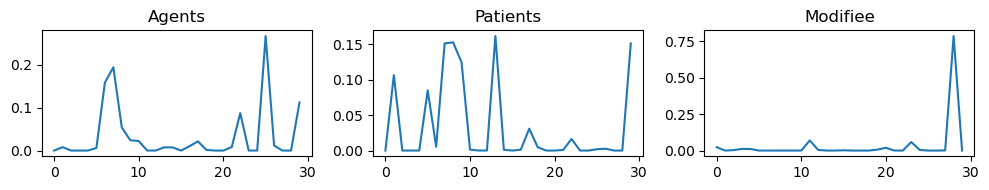

The most important agent topics for persona 0 are :
 
topic 25 :  ['have' 'meet' 'decide' 'be' 'try' 'begin' 'want' 'find' 'realize' 'get']
topic 7 :  ['leave' 'take' 'see' 'be' 'find' 'run' 'have' 'know' 'make' 'look']
topic 6 :  ['tell' 'go' 'ask' 'say' 'love' 'want' 'give' 'get' 'come' 'walk']
topic 29 :  ['go' 'meet' 'return' 'come' 'live' 'arrive' 'join' 'stay' 'work' 'visit']

-------------------
The most important patient topics for persona 0 are :
 
topic 13 :  ['marry' 'meet' 'fall' 'attract' 'send' 'name' 'engage' 'involve'
 'reunite' 'find']
topic 8 :  ['get' 'make' 'break' 'introduce' 'go' 'propose' 'end' 'spend' 'sleep'
 'pick']
topic 29 :  ['go' 'meet' 'return' 'come' 'live' 'arrive' 'join' 'stay' 'work' 'visit']
topic 7 :  ['leave' 'take' 'see' 'be' 'find' 'run' 'have' 'know' 'make' 'look']

-------------------
The most important modifiee topics for persona 0 are :
 
topic 28 :  ['girl' 'sister' 'king' 'prostitute' 'little' 'musketeer' 'diner' 'older'
 'native' 'younger'

In [6]:
def plot_persona(i, top_topics) : 
    
    fig = plt.figure(figsize=(10, 2))


    plt.subplot(131)
    plt.title('Agents')
    plt.plot(agents[i])

    plt.subplot(132)
    plt.title('Patients')
    plt.plot(patients[i])

    plt.subplot(133)
    plt.title('Modifiee')
    plt.plot(modifiee[i])


    fig.tight_layout()
    plt.show()

    top_agents_topics = top_n_indices(agents[i], top_topics)
    top_patients_topics = top_n_indices(patients[i], top_topics)
    top_modifiee_topics = top_n_indices(modifiee[i], top_topics)

    print(f"The most important agent topics for persona {i} are :\n ")
    for t in top_agents_topics : 
        top_words = top_n_indices(topics[t], TOP_N_WORDS)
        print(f"topic {t} :  {vocabulary[top_words]}")
        
    print('\n-------------------')
    print(f"The most important patient topics for persona {i} are :\n ")
    for t in top_patients_topics : 
        top_words = top_n_indices(topics[t], TOP_N_WORDS)
        print(f"topic {t} :  {vocabulary[top_words]}")

    print('\n-------------------')
    print(f"The most important modifiee topics for persona {i} are :\n ")
    for t in top_modifiee_topics : 
        top_words = top_n_indices(topics[t], TOP_N_WORDS)
        print(f"topic {t} :  {vocabulary[top_words]}")
    
plot_persona(0, 4)


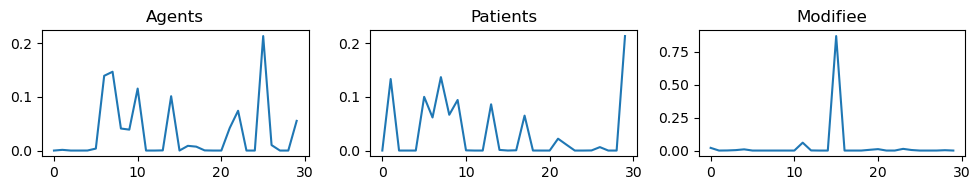

The most important agent topics for persona 16 are :
 
topic 25 :  ['have' 'meet' 'decide' 'be' 'try' 'begin' 'want' 'find' 'realize' 'get']
topic 7 :  ['leave' 'take' 'see' 'be' 'find' 'run' 'have' 'know' 'make' 'look']
topic 6 :  ['tell' 'go' 'ask' 'say' 'love' 'want' 'give' 'get' 'come' 'walk']
topic 10 :  ['die' 'give' 'want' 'come' 'refuse' 'leave' 'suffer' 'make' 'commit'
 'welcome']

-------------------
The most important patient topics for persona 16 are :
 
topic 29 :  ['go' 'meet' 'return' 'come' 'live' 'arrive' 'join' 'stay' 'work' 'visit']
topic 7 :  ['leave' 'take' 'see' 'be' 'find' 'run' 'have' 'know' 'make' 'look']
topic 1 :  ['tell' 'love' 'see' 'ask' 'give' 'meet' 'confront' 'invite' 'call' 'talk']
topic 5 :  ['kill' 'tell' 'save' 'find' 'arrest' 'name' 'bring' 'force' 'warn'
 'release']

-------------------
The most important modifiee topics for persona 16 are :
 
topic 15 :  ['father' 'parent' 'maya' 'phane' 'villa' 'own' 'late' 'dead'
 'conservative' 'businessman']


In [8]:
plot_persona(16, 4)